In [97]:
import json
from collections import defaultdict
import pandas as pd

def get_response(fname):
    with open(fname, 'r') as f:
        data = f.read()

    response = json.loads(data)

    surv_resp = defaultdict(dict)
    pass_resp = defaultdict(str)
    time_resp = defaultdict(str)

    for k, v in response.items():
        if 'response' in k:
            temp = k.split("_")
            pid = temp[0].strip('p')
            v = json.loads(v)
            surv_resp[pid].update(v)
        elif 'time' in k:
            temp = k.split("_")
            pid = temp[0]
            time_resp[pid] = float(v)
        elif 'password' in k:
            pass_resp[k] = v

    return (pass_resp, time_resp, surv_resp)

In [98]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [99]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []

}

In [100]:
questions = {}
for page_id in [3, 7, 8, 12, 14]:
    page_name = page_map.get(str(page_id))
    question_file = f'{page_name}.json'

    with open(f'questions/{question_file}', 'r') as f:
        questions[str(page_id)] = json.loads(f.read())

def get_qdetails(pid, qsid):
    pid = str(pid)
    qid, sid = qsid.split('-')
    if not questions.get(pid): return "Page ID not found."
    ret_text = ""
    for question in questions.get(pid):
        if question.get('qid') == int(qid):
            ret_text += question.get('text')
            for subquestion in question.get('subquestions'):
                if subquestion.get('sid') == int(sid):
                    ret_text += '\n' + str(subquestion)
    return ret_text

In [101]:
import os
fpath = './responses'
password_response = []
time_response = []
survey_response = []
for i, fname in enumerate(os.listdir(fpath)):
    if fname.endswith('.json'):
        pss, tim, sur = get_response(os.path.join(fpath, fname))
        password_response.append(pss)
        time_response.append(tim)
        survey_response.append(sur)

In [102]:
import pandas as pd
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password1,password2,password2_recall1
0,123456789,123456789,NaN
1,Love4510o,ildld3,NaN
2,Bilbosaur12,Ilicisg12@,Ilicisj12@
3,Dog@99769,Dog@99769,NaN
4,Messi*1212,Messi@*1212,NaN


In [103]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpass,fcog,fpasssurvey,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,4.323,22.381,147.522,21.423,14.650,4.902,11.532,36.838,156.846,8.524,22.993,130.065,24.505,14.223,60.096,11.347050
1,5.042,36.732,28.774,18.385,9.584,7.963,18.816,55.110,167.357,7.638,29.018,12.435,49.621,13.482,31.042,8.183317
2,3.653,33.910,26.194,18.000,9.503,8.261,43.191,54.669,129.393,11.365,70.158,25.568,53.969,27.572,48.867,9.404550
3,13.208,97.288,68.168,72.894,21.064,16.241,37.607,87.287,227.620,11.159,33.277,39.204,105.122,22.361,72.795,15.421583
4,3.279,49.026,6.619,21.403,12.474,6.794,14.355,54.044,216.902,24.188,54.640,4.929,69.356,25.821,38.808,10.043967


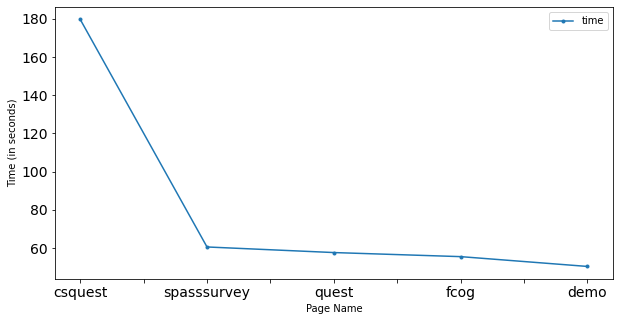

In [104]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [105]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,7,14,12,3
0,"{'6-1': '4', '7-1': '5', '7-2': '6', '7-3': '5...","{'1-11': '5', '1-15': '6', '1-14': '4', '1-12'...","{'1-1': 'Man', '2-1': '45-49 years old', '3-1'...","{'1-1': '5', '2-1': '4', '3-1': '5', '3-2': '4...","{'1-1': '5', '2-1': '5', '2-2': '6', '2-3': '5..."
1,"{'6-1': '1', '7-1': '7', '7-2': '6', '7-3': '6...","{'1-12': '6', '1-16': '6', '1-13': '7', '1-17'...","{'1-1': 'Woman', '2-1': '18-24 years old', '3-...","{'1-1': '5', '2-1': '6', '3-1': '5', '3-2': '2...","{'1-1': '4', '2-1': '3', '2-2': '4', '2-3': '5..."
2,"{'6-1': '1', '7-1': '2', '7-2': '2', '7-3': '2...","{'1-17': '5', '1-13': '5', '1-14': '4', '1-11'...","{'1-1': 'Woman', '2-1': '30-34 years old', '3-...","{'1-1': '6', '2-1': '4', '3-1': '7', '3-2': '1...","{'1-1': '5', '2-1': '6', '2-2': '4', '2-3': '1..."
3,"{'6-1': '1', '7-1': '6', '7-2': '7', '7-3': '6...","{'1-11': '7', '1-14': '7', '1-12': '6', '1-16'...","{'1-1': 'Woman', '2-1': '25-29 years old', '3-...","{'1-1': '7', '2-1': '6', '3-1': '3', '3-2': '1...","{'1-1': '7', '2-1': '7', '2-2': '7', '2-3': '6..."
4,"{'6-1': '1', '7-1': '7', '7-2': '7', '7-3': '6...","{'1-14': '7', '1-12': '6', '1-17': '6', '1-15'...","{'1-1': 'Woman', '2-1': '25-29 years old', '3-...","{'1-1': '7', '2-1': '7', '3-1': '2', '3-2': '1...","{'1-1': '7', '2-1': '7', '2-2': '7', '2-3': '6..."


### Attention Check

In [106]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   }
}

In [107]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [108]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

print(attentive_participants)

defaultdict(<function <lambda> at 0x7fdf40f92af0>, {'0': False, '1': True, '2': True, '3': True, '4': True})


In [109]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive

,attentive
0,False
1,True
2,True
3,True
4,True


### First Password Survey Analysis

In [110]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,The password I have created is:,"[{'sid': 1, 'type': 'likert', 'title': '', 'el..."
1,2,The password I have created:,"[{'sid': 1, 'type': 'likert', 'title': 'is har..."
2,3,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [111]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4
1-1,5,4,5,7,7
2-1,5,3,6,7,7
2-2,6,4,4,7,7
2-3,5,5,1,6,6
2-4,6,2,2,1,3


In [112]:
get_qdetails('3', '1-1')

"The password I have created is: \n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Weak', 'high': 'Strong'}}"

In [113]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

### Quest Analysis

In [114]:
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,mean
1-11,5,6,6,7,7,6.2
1-15,6,6,5,7,7,6.2
1-14,4,6,4,7,7,5.6
1-12,5,6,5,6,6,5.6
1-17,5,6,5,6,6,5.6
1-13,6,7,5,6,6,6.0
1-16,5,6,5,6,6,5.6
1-8,5,5,4,6,7,5.4
1-3,4,4,3,7,6,4.8
1-10,6,5,5,6,7,5.8


In [115]:
# quest
normqsid = ['1-4']
import json
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,mean
helpful,5.0,6.0,6.0,7.0,7.0,6.2
structured,6.0,6.0,5.0,7.0,7.0,6.2
well grouped,4.0,6.0,4.0,7.0,7.0,5.6
beneficial,5.0,6.0,5.0,6.0,6.0,5.6
organized,5.0,6.0,5.0,6.0,6.0,5.6
rewarding,6.0,7.0,5.0,6.0,6.0,6.0
ordered,5.0,6.0,5.0,6.0,6.0,5.6
appealing,5.0,5.0,4.0,6.0,7.0,5.4
easy,4.0,4.0,3.0,7.0,6.0,4.8
useful,6.0,5.0,5.0,6.0,7.0,5.8


In [116]:
# csquest
# qualindex = ['9-1', '11-1', '12-1']

qualindex = ['9-1', '11-1']

csquest = pd.DataFrame(survey_response_df['8'].to_dict())
csquestqual = csquest.loc[qualindex]
display(csquestqual)

,0,1,2,3,4
9-1,"[Social Media, Email, Gaming Websites]","[Financial Websites, Government Websites, Cour...","[Social Media, Email, Course Management Websit...","[Course Management Websites, e.g. Canvas, Blac...","[Financial Websites, Course Management Website..."
11-1,Let's take a look at some of the most importan...,I think its a great strategy. I like how its a...,I think it's a good presentation. The only par...,This is good teaching for beginners. Very usef...,This is easy to learn for all. very easy to un...


In [117]:
normqsid = []

csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant

IndexError: list index out of range

In [ ]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4
1-1,5,5,6,7,7
2-1,4,6,4,6,7
3-1,5,5,7,3,2
3-2,4,2,1,1,1
3-3,5,3,1,1,1
3-4,6,5,6,6,5
4-1,2,2,2,2,2
5-1,5,4,6,7,7
6-1,4,5,1,6,6
7-1,5,5,7,5,5


In [ ]:
# demo
pd.DataFrame(survey_response_df['14'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,Man,Man,Man,Man,Man,Woman,Man,Woman,Woman,Man
2-1,50-54 years old,25-29 years old,30-34 years old,18-24 years old,25-29 years old,35-39 years old,30-34 years old,25-29 years old,40-44 years old,55-59 years old
3-1,[White],[White],[White],[White],[White],[White],[White],[Hispanic or Latino],[White],[White]
4-1,Four-year College Degree,High School Graduate,High School Graduate,Four-year College Degree,High School Graduate,Graduate degree (MS/Doctorate),Four-year College Degree,Four-year College Degree,Less than High School,Four-year College Degree
5-1,Business,"Computer Science/Engineering, and Information ...",Education,Business,"Computer Science/Engineering, and Information ...",I prefer not to answer,"Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...",homemaker,Other areas of Engineering
6-1,Business or industry,I prefer not to answer,Non-profit organization,Business or industry,Student,I prefer not to answer,Business or industry,Business or industry,homemaker,Business or industry
7-1,Hold or held a work position,Self-taught,No experience,Pursuing or completed a degree,Pursuing or completed a degree,I prefer not to answer,Pursuing or completed a degree,Hold or held a work position,Self-taught,Self-taught
8-1,Pursuing or completed a degree,Self-taught,No experience,No experience,No experience,I prefer not to answer,Self-taught,Formal training,No experience,Self-taught
